# *DYNAMIC* PROGRAMMING

In [ ]:
def count_paths(rows, cols):
    # Create a DP table with (rows+1) x (cols+1)
    dp = [[0] * (cols + 1) for _ in range(rows + 1)]

    # Initialize the first row and first column
    for i in range(rows + 1):
        dp[i][0] = 1
    for j in range(cols + 1):
        dp[0][j] = 1

    # Fill the DP table
    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            dp[i][j] = dp[i-1][j] + dp[i][j-1]

    return dp[rows][cols]

# For a 16x12 grid
rows = 16
cols = 12
print(count_paths(rows, cols))  # Output the number of paths


30421755


In [ ]:
def count_paths_optimized(rows, cols):
    # Create a 1D array with (cols + 1) elements
    dp = [1] * (cols + 1)

    # Update the array based on the DP relation
    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            dp[j] = dp[j] + dp[j - 1]

    return dp[cols]

# For a 16x12 grid
rows = 16
cols = 12
print(count_paths_optimized(rows, cols))  # Output the number of paths


30421755


Longest Path in a Directed Graph Problem: Find a longest path between two nodes in an edge-weighted directed graph.

Input: An edge-weighted directed graph with source and sink nodes.
Output: A longest path from source to sink in the directed graph.
STOP and Think: What is the length of a longest path between the source and sink in the directed graph shown on the right in the figure below?

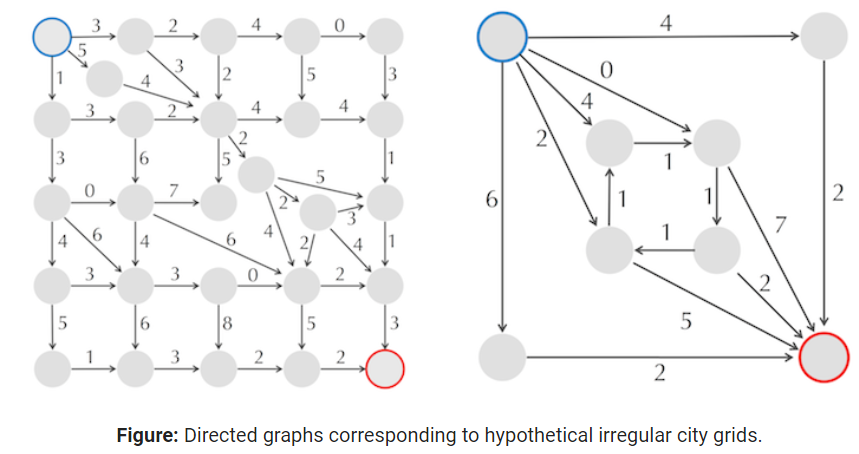

If a directed graph contained a directed cycle (e.g., the four central edges of weight 1 in the graph below), then a tourist could traverse this cycle indefinitely, revisiting the same attractions over and over again and creating a path of huge length. For this reason, the graphs that we will consider in this chapter do not contain directed cycles; such graphs are called directed acyclic graphs (DAGs).

Longest Path in a DAG Problem: Find a longest path between two nodes in an edge-weighted DAG.

Input: An edge-weighted DAG with source and sink nodes.
Output: A longest path from source to sink in the DAG.
STOP and Think: Do you see any similarities between the Longest Path in a DAG Problem and the Longest Common Subsequence Problem?

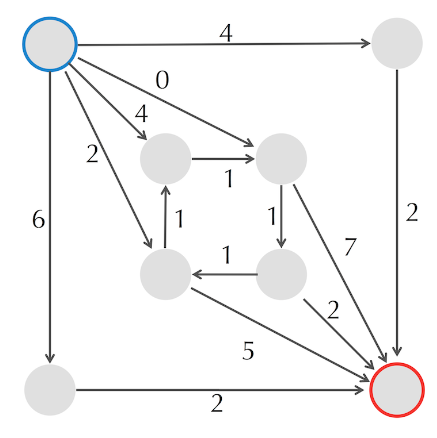

The Change Problem

Code Challenge: Solve the Change Problem. The DPChange pseudocode is reproduced below for your convenience.

Input: An integer money and an array Coins = (coin1, ..., coind).
Output: The minimum number of coins with denominations Coins that changes money.



```
# DPChange(money, Coins)
    MinNumCoins(0) ← 0
    for m ← 1 to money
        MinNumCoins(m) ← ∞
            for i ← 0 to |Coins| - 1
                if m ≥ coini
                    if MinNumCoins(m - coini) + 1 < MinNumCoins(m)
                        MinNumCoins(m) ← MinNumCoins(m - coini) + 1
    output MinNumCoins(money)
```



In [ ]:
def DPChange(money, coins):
    # Initialize a dictionary to store the minimum number of coins for each amount
    MinNumCoins = {0: 0}

    # Loop over each amount from 1 to the target amount 'money'
    for m in range(1, money + 1):
        MinNumCoins[m] = float('inf')  # Initialize as infinity for comparison

        # Check each coin
        for coin in coins:
            if m >= coin:  # If the current coin can be used
                # If using the coin gives a better result, update the dictionary
                MinNumCoins[m] = min(MinNumCoins[m], MinNumCoins[m - coin] + 1)

    # Return the minimum number of coins needed for the target amount 'money'
    return MinNumCoins[money]

# Sample input
money = 18739
coins = [5, 3, 1]

# Sample output
print(DPChange(money, coins))  # Expected output: 2


3749


We now have the outline of a dynamic programming algorithm for finding the length of a longest path in the Manhattan Tourist Problem, called ManhattanTourist. In the following pseudocode, downi, j and righti, j are the respective weights of the vertical and horizontal edges entering node (i, j). We denote the matrices holding (downi, j) and (righti, j) as Down and Right, respectively.



```
# ManhattanTourist(n, m, Down, Right)
    s0, 0 ← 0
    for i ← 1 to n
        si, 0 ← si-1, 0 + downi-1, 0
    for j ← 1 to m
        s0, j ← s0, j−1 + right0, j-1
    for i ← 1 to n
        for j ← 1 to m
            si, j ← max{si - 1, j + downi-1, j, si, j - 1 + righti, j-1}
    return sn, m
```



In [ ]:
def ManhattanTourist(n, m, Down, Right):
    # Initialize the first row and column of the solution matrix
    s = [[0] * (m + 1) for _ in range(n + 1)]
    for i in range(1, 1+n):
      s[i][0] = s[i-1][0] + Down[i-1][0]
    for j in range(1, 1+m):
      s[0][j] = s[0][j-1] + Right[0][j-1]
    for i in range(1, 1+n):
      for j in range(1, 1+m):
        s[i][j] = max(s[i-1][j] + Down[i-1][j], s[i][j-1] + Right[i][j-1])
    return s[n][m]


In [ ]:
def ManhattanTourist(n, m, Down, Right):
    # Initialize the first row and column of the solution matrix
    s = [[0] * (m + 1) for _ in range(n + 1)]

    # Fill the first column with values from Down
    for i in range(1, n + 1):
        s[i][0] = s[i - 1][0] + Down[i - 1][0]

    # Fill the first row with values from Right
    for j in range(1, m + 1):
        s[0][j] = s[0][j - 1] + Right[0][j - 1]

    # Fill the rest of the grid with the maximum path length
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            s[i][j] = max(s[i - 1][j] + Down[i - 1][j], s[i][j - 1] + Right[i][j - 1])

    return s[n][m]

# Parsing the input data
def parse_input(input_str):
    parts = input_str.strip().split('-')

    # Convert the first part (before the '-') to the Down matrix
    Down_str = parts[0].strip().splitlines()[1:]  # Skip the first line (which has n and m)
    Down = [list(map(int, line.split())) for line in Down_str]

    # Convert the second part (after the '-') to the Right matrix
    Right_str = parts[1].strip().splitlines()
    Right = [list(map(int, line.split())) for line in Right_str]

    return Down, Right

# Sample input string
input_str = """
11 5
4 0 0 2 0 2
0 0 2 0 4 4
3 3 3 0 4 2
2 4 0 2 1 1
0 2 4 2 2 1
1 0 1 4 3 1
4 2 2 0 2 3
3 2 0 0 2 0
1 0 4 0 4 2
4 4 2 4 4 1
4 4 4 0 3 1
-
3 2 3 0 0
4 0 3 1 2
1 0 2 1 4
0 0 3 1 4
2 3 4 1 2
0 2 0 3 3
1 4 1 1 3
0 2 0 1 3
2 4 2 0 4
1 4 3 1 1
4 3 1 4 4
0 4 4 4 1
"""

# Parse the input
Down, Right = parse_input(input_str)

# Extract dimensions
n, m = 11, 5

# Get the result
result = ManhattanTourist(n, m, Down, Right)

# Output the result
print(result)  # Expected output: 34


47


Code Challenge: Use OutputLCS (reproduced below) to solve the Longest Common Subsequence Problem.

Input: Two strings s and t.
Output: A longest common subsequence of s and t. (Note: more than one solution may exist, in which case you may output any one.)



```
# OutputLCS(backtrack, v, i, j)
    if i = 0 or j = 0
        return ""
    if backtracki, j = "↓"
        return OutputLCS(backtrack, v, i - 1, j)
    else if backtracki, j = "→"
        return OutputLCS(backtrack, v, i, j - 1)
    else
        return OutputLCS(backtrack, v, i - 1, j - 1) + vi
```


```
# IterativeOutputLCS(Backtrack, v, w)
   LCS ← an empty string
    i ← length of string
    j ← length of string w
    while i > 0 and j > 0
        if Backtrack(i, j) = "↓"
            i ← i-1
        else if Backtrack(i,j) = "→"
            j ← j-1
        else if Backtrack(i,j) = "↘"
            LCS ← concatenate v[i] with LCS
            i ← i-1
            j ← j-1
    return LCS
```




Note: If you are using Python, then you may find that you do not have sufficient "recursion depth" to store the recursive calls for this problem. The command sys.setrecursionlimit(input_number_here) from the sys module will allow us to increase recursion depth.



```
# Sample Input:
AACCTTGG
ACACTGTGA
Sample Output:
AACTGG
```





```
# LCSBackTrack(v, w)
    for i ← 0 to |v|
        si, 0 ← 0
    for j ← 0 to |w|
        s0, j ← 0
    for i ← 1 to |v|
        for j ← 1 to |w|
            match ← 0
            if vi-1 = wj-1
                match ← 1
            si, j ← max{si-1, j , si,j-1 , si-1, j-1 + match }
            if si,j = si-1,j
                Backtracki, j ← "↓"
            else if si, j = si, j-1
                Backtracki, j ← "→"
            else if si, j = si-1, j-1 + match
                Backtracki, j ← "↘"
    return Backtrack
```



In [ ]:
import sys
sys.setrecursionlimit(10**4)

# Function to build the LCS length table and backtrack table
def LCSBackTrack(v, w):
    n = len(v)
    m = len(w)

    # Initialize the DP table for storing lengths of LCS and the backtrack table
    S = [[0] * (m + 1) for _ in range(n + 1)]
    backtrack = [[''] * (m + 1) for _ in range(n + 1)]

    # Fill the DP and backtrack tables
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            match = 0
            if v[i - 1] == w[j - 1]:
                match = 1  # Characters match, add 1 to diagonal value
            # Fill in the DP table with the max LCS length
            S[i][j] = max(S[i - 1][j], S[i][j - 1], S[i - 1][j - 1] + match)

            # Fill in the backtrack table
            if S[i][j] == S[i - 1][j]:
                backtrack[i][j] = '↓'  # Move down
            elif S[i][j] == S[i][j - 1]:
                backtrack[i][j] = '→'  # Move right
            else:
                backtrack[i][j] = '↘'  # Diagonal move (match)

    return backtrack

# Function to backtrack and retrieve the LCS string
def OutputLCS(backtrack, v, i, j):
    if i == 0 or j == 0:
        return ''
    if backtrack[i][j] == '↓':
        return OutputLCS(backtrack, v, i - 1, j)
    elif backtrack[i][j] == '→':
        return OutputLCS(backtrack, v, i, j - 1)
    else:
        return OutputLCS(backtrack, v, i - 1, j - 1) + v[i - 1]



In [ ]:
# Sample input strings
v = "GTCCCAGTGGCAGATCGGAATCTCCCAGGCCTCAGACGGTCTAGAGACGACAAACAGATGATAGACGATCAAAGTTTCGTAGTCGCTAAAGCTCCGAGGGCTGGATGGTTTACTGCAAGTGCCGTGCCCGGTTGCGGCGTGGGTCACCCTTACACAAAAACTCATCCACCGCTGGGCGATTCATTTTCACCGTTTCTATCTCAAAACGCTACGTATGCCTGAGAGCCGCGACATTGAAGTTAAGCCCCGGTGCTTCTAGCAAAGAGTATCGACTGCATGGCGTGGCCTGTGCACTGTGGGCTAGGGTGTAGTGCCCCGACTAATCGGCTGACCAGCGCACTATTTCACAATACATAAGAATGCTTGCTCTTCGAAGCCGCTCTGAAAGAATCCCCAATGCCTAGGGTCCCTGACGCAGGTTATTGGTTTCTTCTCCTACAACTGCAAGTTGAATACCACTACTTAAGCATCTAACACGATTCGGGCGAGCGCATAAATACACAGTGGGTGGTTCACAAAGAAGTAATTGTGCGGACTCTCCATGCAATTTATTTCTTAACAAGATATGTTCATGCTAAAGGCACGGGGCCTCTAACTCTCTTCTGCGAAGTCCTCGTGCTTCCCAGAGCTCCTATTGTCTTGTCTTTCTGGGAAGCTTCACTGGTGTATCCGATCAAAAGAATGTCTATGATGTTTCGGGGTCGATCCCGGGTAAGTAGTGTGTGGTGCATTGTCATAGAATTCTACTTAATTTCCCTGAACCCTAAATATGAATTGGGGACTAAGCCTTTATATGGTTTTGTACTCTAACATACGCAGGTGTATCGCGCGGCTGTAATAGAGGCCGAGGGCCCGTGCCACTAGAAGCCCTAAGTGCAATCCGGCGTGGTACGCACTCACGTTACCGTGG"
w = "GCCGATGGACTATGCTCTTGCTTATTGCGGATGTTTACGCTTCGCTACCACCGGTCTAGGTTGGCATGCACACTCGAATGCGCTCGACCCCCAGGGCGGGGAGCAGGCAACGTGATCTGGCATCTACAATGAAGCTTCGATACCTGTGTGGATAGCTGCCCTACGGGCCAACGGCATTGCAGGAGCTGACAATCGACGGCCGGACTAACCGCAAGGAACCTATGTGCTCGAGCATAAGAGCTCTCCCTTTTCACATTTACTCTATGAATCAGTCCTCTCAGACCCTCGTTTCGTCCAAGCCGTTCCGTCTCCTAGCGGCGTCAGCCTAGACCGTACCGCGCAATTTGTGCAGCACCGCCTGCGCGCTACACTCCAATTATCATAGAGGGCCCTCTGAAGGACAGTTTCACGCGACTTGATCGGCGCAACATGACCTGGGCGCACGCCTGCATACATCACGAGATGGGACCATTCCGTTTGGACCCCATATGTCTAGTAACACTCGCTTAGGTCACTGACTGCCGAAGGGGCATTGCAGCGGCCGCAGATTTGTACGAGCACATGTAAGAAGCTGGGGACTCGTGCTGTCACAAGTCCAAACGGTCCCCAGACTGAAAGGACCTCATGTTAGAAAGCCTGATCTAAACGTTAGATTCGATGTCTAACCTCTCAACACAAGTAAAGTCCTCATTTGAGTTAGTTAGGCAAGCTATCCCCTAATGTTTCTCCGTCGTAGCCGTCGGGTAAGCGTAGGTTCCTGAACCGCGGTCTAAGCACGCTATGCATGTGTACGCGCTGTGGAGTGTAACTATAGCTGCGCCAGATTTAAGAGGTGTCGTAAGTGTCTTGGGAGTCACACAGCATAACGCGAGCTGTGCAAGCGCTAG"

# Get the backtrack table using LCSBackTrack
backtrack = LCSBackTrack(v, w)

# Retrieve the LCS by backtracking
lcs_result = OutputLCS(backtrack, v, len(v), len(w))

# Output the result
print(f"Longest Common Subsequence: {lcs_result}")

Longest Common Subsequence: GCCATGGCAGATCGGATTCCCGCTCACGGTCTAGAGCACACTGATGCGCTCGACCCCCAGGGCGGGGAGCAGGCCGTGTCTGGCACTACAAAACTCATACCGTGGGATAGCTCCCTACGGCCAACGGCATTGAGAGCTGACAATCGACGCGGCTCCGCAGGCTATGTGTCGACTAAGGCTCCCCTTTTCACATACATGAATGCTTGCTCTTCGAAGCCGCTCTAGCCCAGCCTAGGTCCGCGCATTTTGGCCTCCTACACTCAATTAATACCCTCTAAGCATTCACGATTGCGGCGCAAATACCTGGGGGTTCACAAGAGAATTGTGGACCCCATATTTATAACAGTAGTCATGCTAAGGCACGGGCCCAATTTTCGCGAAGTCTCGTGCTTCCAAGTCCAGTCGCTGGGACTCATGTTACCGATCAAAAGATTCGATGTTTCTCACCGTAAGTATTTGGTGTTGCAAGCTACTAATTTCCCTGACCGTGGGTAAGCTAGGTTTGACTCTAACATAGCAGTGTACGCGCGGTGTAATAAGGCCGAGGGCGTGCTGAGCCCAGCAACCGGCTGTGCAACGTAG


In [ ]:
V = 'TGTACG'
W = 'GCTAGT'
# Get the backtrack table using LCSBackTrack
backtrack = LCSBackTrack(V, W)

# Retrieve the LCS by backtracking
LCS_result = OutputLCS(backtrack, V, len(V), len(W))

# Output the result
print(f"Longest Common Subsequence: {LCS_result}")

Longest Common Subsequence: GTAG


In [ ]:
from collections import defaultdict

# Helper function to perform longest path algorithm in DAG
def longest_path_dag(adj_list, top_order):
    # Distance table to store the longest distance from the source
    dist = defaultdict(lambda: float('-inf'))
    dist['a'] = 0  # Starting node 'a' has a distance of 0

    # Track the path
    predecessor = {}

    # Process nodes in topological order
    for node in top_order:
        if dist[node] != float('-inf'):
            for neighbor, weight in adj_list[node]:
                if dist[neighbor] < dist[node] + weight:
                    dist[neighbor] = dist[node] + weight
                    predecessor[neighbor] = node

    # Find the longest path by checking the maximum distance
    # Start from the last node (g) and backtrack to build the path
    max_distance = dist['g']
    path = []
    current = 'g'

    while current in predecessor:
        path.append(current)
        current = predecessor[current]

    path.append('a')  # Add the start node
    path.reverse()    # Reverse to get the correct order

    return max_distance, path

# Adjacency list representation of the graph
adj_list = {
    'a': [('b', 5), ('c', 6), ('d', 5)],
    'b': [('c', 2), ('f', 4)],
    'c': [('e', 4), ('f', 3), ('g', 5)],
    'd': [('e', 6), ('f', 8)],
    'e': [('g', 2)],
    'f': [('g', 1)],
    'g': []  # No outgoing edges from 'g'
}

# Given topological order
top_order = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

# Find the longest path
longest_distance, path = longest_path_dag(adj_list, top_order)

# Output the result
print(f"Longest distance: {longest_distance}")
print("Longest path:", ' '.join(path))


Longest distance: 14
Longest path: a d f g


# From Global to Local Alignment


Code Challenge: Solve the Global Alignment Problem.

Input: A match reward, a mismatch penalty, an indel penalty, and two nucleotide strings.
Output: The maximum alignment score of these strings followed by an alignment achieving this maximum score.



```
# Sample Input:
1 1 2
GAGA
GAT
Sample Output:
-1
GAGA
GA-T
```



In [ ]:
def global_alignment(match_reward, mismatch_penalty, indel_penalty, s1, s2):
    n = len(s1)
    m = len(s2)

    # Initialize the DP matrix and traceback matrix

    dp = [[0] * (m + 1) for _ in range(n + 1)]
    traceback = [[0] * (m + 1) for _ in range(n + 1)]

    # Initialize the first row and first column with indel penalties

    for i in range(1, n + 1):
        dp[i][0] = dp[i - 1][0] - indel_penalty
        traceback[i][0] = 'U'

    for j in range(1, m + 1):
        dp[0][j] = dp[0][j - 1] - indel_penalty
        traceback[0][j] = 'L'

    # Fill in the DP matrix

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i - 1] == s2[j - 1]:
                match = dp[i - 1][j - 1] + match_reward
            else:
                match = dp[i - 1][j - 1] - mismatch_penalty
            delete = dp[i - 1][j] - indel_penalty
            insert = dp[i][j - 1] - indel_penalty

            # Choose the maximum score
            dp[i][j] = max(match, delete, insert)

            # Update the traceback matrix

            if dp[i][j] == match:
                traceback[i][j] = 'D'
            elif dp[i][j] == delete:
                traceback[i][j] = 'U'
            else:
                traceback[i][j] = 'L'


    # Traceback to find the aligned sequences
    aligned_s1 = []
    aligned_s2 = []

    i, j = n, m

    while i > 0 or j > 0:
        if traceback[i][j] == 'D':
            aligned_s1.append(s1[i - 1])
            aligned_s2.append(s2[j - 1])
            i -= 1
            j -= 1

        elif traceback[i][j] == 'U':
            aligned_s1.append(s1[i - 1])
            aligned_s2.append('-')
            i -= 1

        else:
            aligned_s1.append('-')
            aligned_s2.append(s2[j - 1])
            j -= 1

    aligned_s1 = ''.join(aligned_s1[::-1])
    aligned_s2 = ''.join(aligned_s2[::-1])

    return dp[n][m], aligned_s1, aligned_s2


In [ ]:
# Input

match_reward, mismatch_penalty, indel_penalty = 1, 1, 5
s1 = "CTTAGTTGTGAGTTATAAATTATCTCCCCTGAGGTAGGGAACCTGTAACGAATATAACCTCATATATGTCTTAGTTCACACGTAAGACATTATCCTCGGCCTCCTACGAAATTTCAATTTAACCCGCCATAGGACTGTGCTCACGTTACGCATTGCTCAACCGCGATGCTGGCCTATCAATACCCACCTGAATACCCGTCGAGTCTTAGTTGCGTGCCTAGATACGCTGACATCAGGATAGGGGCAGTCCCGTTTACAAAGGATCCGATAGGCCCTAAATTAACAGACGTGTACGCAAATGCTAGTAATTGTTTTCCGCCCACTCTGCGAACAATATTCTAAAGTATGGGTCTTCACATAGCGCAGCCATAGAGGGTGGGGCGTATTAGGTGAACGACCCGACGTCCTGGCATACTCTGACAGGGAAGTTAGGTCATGCCCCTTCTGAATCGCCCGCTTCCGCAGGCGTTACAACAAGCCACAAACGTACAACGTCTGGCATGCTGAAGCCAGTTGTACCACGGCTGCGTTCAAACCGTCAGTAGTCATGGGACCGTATCACTTCCGGATTCCAGCTGGCGCCCCACATCGGTCGGAGTATCCTTATAACACGTTGGGCGCACTGGGCCGTGGCTAACAAGCACGGCGGTGGCATTTAACATTTTTAGGAGCTGGCGCACGTCGAGTATCCGTGCCTACAGTAATTTGTTCCAGTCGCGGGTGATATACACTCTGTCAGATTACGGTCCAAGCAGCATCTGAACTGTTCTAATCGAAGACCTAGCCTATGTGCTAGTTTCATGAGTAAGAAAAGAAAATGCTGTCTGTATGGCTCAATGGCTTATCGGAATCCACTCACATAGTGGCCCAAATGCTCTTTCGGAGCTCAATCGTTATTAA"
s2 = "CTTAGAGTTATAAGTATATTATGCCTCCCCTGTCGTTAAGGTAGGTAGCACAATCTGTAACGGATGGTAAATAACCTCGGAACTTCATAATGTATATTAGTTCACCGTAATCGCCAGGGGCCTAAATTAACCCGGCATCCTACAGGACTGTGCTCACGTTACAGAGACAGTACTGCTCAACCGCGAATCAATGAATACCCTCAATACCCGTCGAGTCTTGTCGGATTCGTTGCGTGCCTAGATACGCTGACATGATAGCGGCAGTCCCGTTTACGGTAGGCCCTATCGTGTACGCTAATTGTGCCCACTCATGCGAAGCGAATATCCTAAAGTATGGGGAATTACTGATTCACCGCAGTGCAGCCATAGTATAGGCCCGGGGGCGTATTAGGCGAACGACCCGACGTGCACGTAACCTGATACCAGACAAGGTCATGCCGCTTCTGAATCGCCCCGCGCCTTCCTCAAGCGTTACAAATAGCAAGCCACAAAGTTGAGGTTCATCGCCTGGCATGCTCAAGCCATACCAGGGTTCCCAACCGTCAGTGGGAGATAAATTCCGTATCACTTCCGGTCTTGCTCGGGCGTCGCCCATGTCGGAGTATCCTTATAACACGGTGGGCGCTCTGAAGGCGCAACAAGCACGGCGGTGCATTGGATGACATTGGTGCTGCACGTCGAGTATCCCGAGCGGTGGTCTAATTTGAACATATACACTCTGCGGGCGCCTGAACTCTCGGAGAACCTCCCCCTCATCGAAGATATGCATCCCCTATGTGCCAGTTTCATGAGTAAGAAATAGTTCATGCTGTCTGTATGGCTCAATGGCTTATCGGAATCCACTTCCGAACATCGAGTGAAATAGTGGGTGGCCGCCCAATGCGAGCTCAATCGATATGAA"

# Call the function and print the result

alignment_score, aligned_s1, aligned_s2 = global_alignment(match_reward, mismatch_penalty, indel_penalty, s1, s2)
print(alignment_score)
print(aligned_s1)
print(aligned_s2)

-122
CTTAG-TTGTGAGTTATAAATTATCTCCCCTG-AGGTAGGGAACCTGTAACGA-ATATAAC--CTCATATATGTCTTAGTTCACACGTAA-G-ACATTA--TCCTCGGCCTCCTACGAAATTTCAATTTAACC--C-GCC-ATAGGACTGTGCTCACGTTACGCATTGCTCAACCGCGATGCTGGCCTATCAAT-ACCCACCTGAATACCCGTCGAGTCTTAGTTGCGTGCCTAGATACGCTGACATCAGGATAGGGGCAGTCCCGTTTACAAAGGATCCGATAGGCCCTAAATTAACAGACGTGTACGCAAATGCTAGTAATTGTTTTCCGCCCACTCTGCGAACAATATTCTAAAGTATGGGTCTTCACATAGCGCAGCCATAGAGGGTGGGGCGTATTAGGTGAACGACCCGACGTCCTGGCATACTCTGACAGGGAAGTTAGGTCATGCCCCTTCTGAATCG--CC-CG-CTTCCGCAGGCGTTACAACAAGCCACAAACGTACAACGTCTGGCATGCTGAAGCCAGTTGTA-CCACGGCTGCGTT-CAAACCGTCAGT-AGTCAT-GGGACCGTATCACTTCCGGATTCCAGCTGGCGCCCCACATCGGTCGGAGTATCCTTATAACACGTTGGGCGCACTGGGCCGTGGCTAACAAGCACGGCGGTGGCATTTAACATTTTTAGGAGCTGGCGCACGTCGAGTATCCGTGCCTACAGTAATTTGTTCCAGTCGCGGGTGATATACACTCTGTCAGATTACGGTCCAAGCAGCATCTGAACTGTTCTAATCGAAGACCTAGCCTATGTGCTAGTTTCATGAGTAAGAAA-AGAAAATGCTGTCTGTATGGCTCAATGGCTTATCGGAATCCAC-T-C--ACAT--AGTGGCCCA---AAT----GCTCTTTCGGAGCTCAATCGTTATTAA
CTTAGAGTTATAAGTATATTATGCCTCCCCTGTCGTTAAGGTAGGTAGCACAATCTGT

# Local alignment


When biologically significant similarities are present in some parts of sequences v and w and absent from others, biologists attempt to ignore global alignment and instead align substrings of v and w, which yields a local alignment of the two strings. The problem of finding substrings that maximize the global alignment score over all substrings of v and w is called the Local Alignment Problem.

Local Alignment Problem: Find the highest-scoring local alignment between two strings.

Input: Strings v and w as well as a matrix score.
Output: Substrings of v and w whose global alignment score (as defined by score) is maximized among all substrings of v and w.
The straightforward but inefficient way to solve the Local Alignment Problem is to find the longest path connecting every pair of nodes in the alignment graph (rather than just those connecting the source and sink, as in the Global Alignment Problem), and then to select the path having maximum weight over all these longest paths.

You might still be wondering how we can take these free taxi rides through the alignment graph. The point is that you are in charge of designing whatever Manhattan-like DAG you like, as long as it adequately models the specific alignment problem at hand. Transformations like free taxi rides will become a common theme in this chapter. Various alignment problems can be solved by constructing an appropriate DAG with as few edges as possible (to minimize runtime), assigning edge weights to model the requirements of the problem, and then finding a longest path in this DAG.

Code Challenge: Solve the Local Alignment Problem.

Input: Two protein strings written in the single-letter amino acid alphabet.
Output: The maximum score of a local alignment of the strings, followed by a local alignment of these strings achieving the maximum score. Use the PAM250 scoring matrix for matches and mismatches as well as the indel penalty σ = 5.



```
# Sample Input:
MEANLY
PENALTY
Sample Output:
15
EANL-Y
ENALTY
```



In [ ]:
# Define the file path to the PAM250 matrix
file_path = '/content/drive/MyDrive/Bioinformatics /BIO III/PAM250.txt'

# Initialize an empty dictionary to store the PAM250 matrix
PAM250 = {}

# Open and read the file
with open(file_path, 'r') as file:
    # Read the entire file content
    data = file.read()

    # Convert the string representation of the dictionary into an actual Python dictionary
    PAM250 = eval(data)


codi


In [ ]:
def local_alignment(score_matrix, indel_penalty, s1, s2):
    n = len(s1)
    m = len(s2)

    # Initialize the DP matrix and traceback matrix
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    traceback = [[0] * (m + 1) for _ in range(n + 1)]

    max_score = 0  # To keep track of the maximum score
    max_pos = (0, 0)  # Position of the maximum score in the matrix

    # Fill in the DP matrix
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            # Check if characters are gaps
            if s1[i - 1] == '-' or s2[j - 1] == '-':
                # Handle gaps in alignment
                match = 0
            else:
                # Get the score from the scoring matrix
                match = score_matrix[s1[i - 1]][s2[j - 1]]

            # Calculate the possible scores: match/mismatch, deletion, insertion
            match_score = dp[i - 1][j - 1] + match
            delete_score = dp[i - 1][j] - indel_penalty
            insert_score = dp[i][j - 1] - indel_penalty

            # The key difference for local alignment: no negative scores
            dp[i][j] = max(0, match_score, delete_score, insert_score)

            # Update the traceback matrix
            if dp[i][j] == match_score:
                traceback[i][j] = 'D'
            elif dp[i][j] == delete_score:
                traceback[i][j] = 'U'
            elif dp[i][j] == insert_score:
                traceback[i][j] = 'L'
            else:
                traceback[i][j] = '0'  # This indicates a zero-reset, starting fresh

            # Keep track of the maximum score and its position
            if dp[i][j] > max_score:
                max_score = dp[i][j]
                max_pos = (i, j)

    # Traceback from the position of the highest score
    aligned_s1 = []
    aligned_s2 = []

    i, j = max_pos
    while i > 0 and j > 0 and dp[i][j] != 0:
        if traceback[i][j] == 'D':
            aligned_s1.append(s1[i - 1])
            aligned_s2.append(s2[j - 1])
            i -= 1
            j -= 1
        elif traceback[i][j] == 'U':
            aligned_s1.append(s1[i - 1])
            aligned_s2.append('-')
            i -= 1
        else:  # 'L'
            aligned_s1.append('-')
            aligned_s2.append(s2[j - 1])
            j -= 1

    # Reverse the alignments (since we've built them backwards)
    aligned_s1 = ''.join(aligned_s1[::-1])
    aligned_s2 = ''.join(aligned_s2[::-1])

    return max_score, aligned_s1, aligned_s2

# Define the scoring matrix for A, C, G, T
def create_score_matrix(match_score=1, mismatch_penalty=-3):
    bases = 'ACGT'
    score_matrix = {base: {other_base: match_score if base == other_base else mismatch_penalty
                           for other_base in bases}
                    for base in bases}
    return score_matrix

# Define the sequences
s1 = "ACAGTAGACAC"
s2 = "ATAC-AGATAC"

# Create the scoring matrix with match score and mismatch penalty
score_matrix = create_score_matrix(match_score=1, mismatch_penalty=-3)
indel_penalty = 1

# Run the local alignment function
max_score, aligned_s1, aligned_s2 = local_alignment(score_matrix, indel_penalty, s1, s2)

print(f"Score of the bold portion: {max_score}")
print(f"Alignment 1: {aligned_s1}")
print(f"Alignment 2: {aligned_s2}")


Score of the bold portion: 4
Alignment 1: AC-AG-TA
Alignment 2: AC-AGATA


Levenshtein introduced edit distance but did not describe an algorithm for computing it, which we leave to you.

Edit Distance Problem: Find the edit distance between two strings.

Input: Two strings.
Output: The edit distance between these strings.
Code Challenge: Solve the Edit Distance Problem.

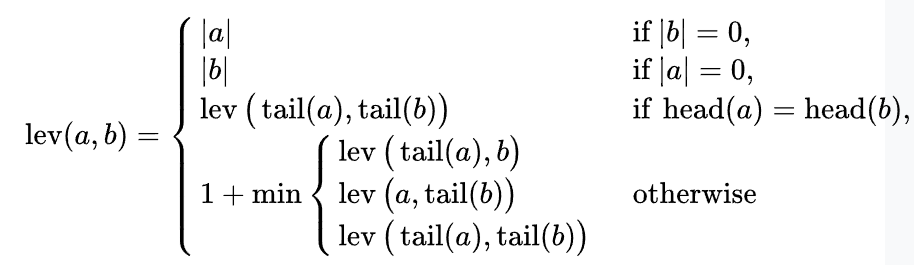



```
# Sample Input:
GAGA
GAT
Sample Output:
2
```



In [ ]:
import numpy as np

def edit_distance(s1, s2):
    n = len(s1)
    m = len(s2)

    # Initialize the DP matrix
    score_matrix = [[0] * (m + 1) for _ in range(n + 1)]

    # Fill the first row and column
    for i in range(1, n + 1):
        score_matrix[i][0] = i  # Deleting all characters of s1 to match an empty s2
    for j in range(1, m + 1):
        score_matrix[0][j] = j  # Inserting all characters of s2 to match an empty s1

    # Fill in the rest of the DP matrix
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s1[i - 1] == s2[j - 1]:
                cost = 0  # No substitution cost if characters are the same
            else:
                cost = 1  # Substitution cost if characters are different

            # Update the DP matrix with the minimum of the three operations
            score_matrix[i][j] = min(
                score_matrix[i - 1][j] + 1,    # Deletion
                score_matrix[i][j - 1] + 1,    # Insertion
                score_matrix[i - 1][j - 1] + cost  # Substitution
            )

    # The edit distance is the value in the bottom-right corner of the matrix
    return score_matrix[n][m]

In [ ]:
# Sample Input
s1 = "GTACGGCAAAGAATATTCAGTCGGCGCCGCGTTAAAATGTGCTTAAAGCAACCTGTCATGCAACCGGGTATTATCACTCAGCAGATTACCAGGCTTGAATCGTCACCGCTCACGTACATGGTTACATGCAATATCGGTACGATGACCTCTGTAAGCGTAATATGTCGTTTTTGTAGTCTATCGGGGCGTACAACGTCATGGCGGGATATAGTGAGAGGATTCGAGAAATGTAAGCGCCGCACGAGGTTCATTTCTTACCCCCTGTCGAGGTCCCTTTTAATGAGCAATCCCACGCTGCTCTGCCATCCACTCAAACGCTAGGTACACTGAGATGTCGGGCAAGGCTCCCTCTCGGCGCTCGATGGAGCGGGGACGTATAACTTTTCTGATACCCAACATATTGGATCAGGTATGGTTCGGTCAACGATCTTTTGAGTCATACTCTTTTACCGCGAGTTGATAGGCTTTAGCCTGGCGTGCAACCTATGGCCGTAAGAGGACAAGGCAACTCGCGTATTTGATAATTGCAGAAGCGGTTTTTGCCATATCGAGTATCTCTGGCGCTTTGAAGATAATGGAATCTTATCAGACCCGGCAGGCAACGCCCAACAATCGATGCTTCCCCCGGACGCAGAGTTTGTCTCCGGGCAATGTATAGTCCCGTCTATAAAACGGAAAACAAAGATTGGTGGGGATCGCCTGACGATAAGTACAACGTCGATCCGCCAAGATTTTTGGATCGCCACCATCTAATCGAACTGAGTCGCATACTTACGGTCCGACTCGCGGCGGTATTGTTATCGCCCAGCCCCTATTCCTGTGTTGTGAATTCGGCCTTTGTGATTGGTGTGACAGAATCCAACACGAACATTCCAGCACAGTAAATGCATGCTGCGTCAA"
s2 = "GTACGGCAAATCATTAGACCGCGCGTTAAACTGCGCTTAAAGCAACGCATGTCCTGATCATGCATCCACCGGGTATTAATCAGCAGTTGACCACGCTTGAATCGTCACCGCTCACGTACATGGTACCCATTGCAATATCGGTACATAATGACCTCTGTAAGCTAATATGTTATCGGGGCGTACAACGTCATGAACGTGAGACGGGAATAGTGAGAGGATCACTTATCGAGAAATGTAATTCACGCTCGCACGAGCGATGTGTAACACTTTCATGGTCGCACCCACTCCTTTTAATGACGACGCCTATTCCCACGCTGCTCTGCCAACCACTCATTACGCTTTAGCTACACTGAGCAGCTCAACCGACGGGCAGTGACAACAACCCCCTCGGCGCTCGATGGATAGGAAGGACGTATAACTTTTCAAGATACCCAATTATGGTTCGGTCAACGATCTATGTTCTTGAGTCAACGTGGACACCACTTTTCGTCCGCGAGTAAGAAAGGCTTTAGACGCGCGTCAAGAGGACAAGCGCAACTCGCGTATTTGATAATTCAAATGCACACGCAGTGAAAAGCGGTTTTTTGGTTAAGAATGAAGCACACATGGACATCTTTTGGAATCGTATCAGAGCAGGCAGGCAGTAGTTTCGCGCCGCTCAAAACAATCCCGATGCTTCCCGTACCCAGAGTTTGCATGGGCAATGTATAGTCCCGTCGAAAAAACAAGATGGGTGGGGATCGCCTGACTTTGATAATAAGTACAACGTCGATCCGCAAAGTTGCTAATTAACATCCAGGAGCGCCACCATCTAACTGAGTCGCATATTCCTTTGCTTTAACAGGAACTCTTATTGTTATCTCGCAAGCTATCCCCGATTCGTTATAATCTGTGTTGTGGGAGGGCCGAGCTTCGGACCAACACATTCCAGGCGTGATGCATGCTGCGTCAA"

# Call the function and print the result
result = edit_distance(s1, s2)
print(result)


324
